In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# _*Dataset Overview*_

Here we are going through the dataset and looking for the insights

In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Imputation Missing values
1 - Mean value Imputation

<Axes: xlabel='age', ylabel='Count'>

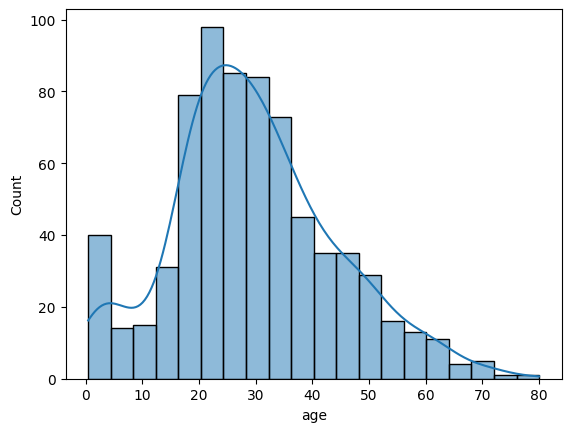

In [8]:
sns.histplot(df['age'], kde = True)

In [12]:
df['age_mean'] = df['age'].fillna(df['age'].mean()).round(3)
df[['age_mean', 'age']]

,age_mean,age
0,22.000,22.0
1,38.000,38.0
2,26.000,26.0
3,35.000,35.0
4,35.000,35.0
...,...,...
886,27.000,27.0
887,19.000,19.0
888,29.699,NaN
889,26.000,26.0


<Axes: xlabel='age_mean', ylabel='Count'>

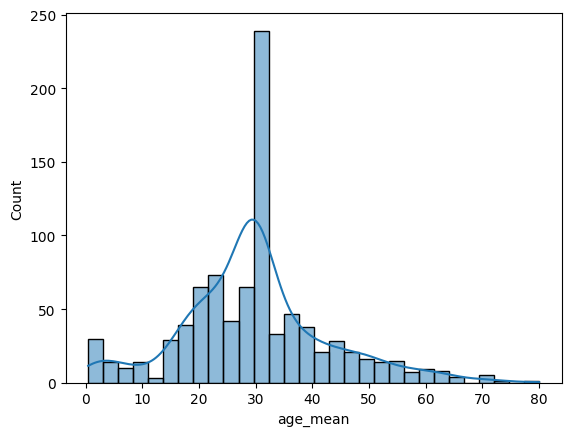

In [17]:
sns.histplot(df['age_mean'], kde = True)

## Median Imputataion - If we have outliers in dataset

In [15]:
df['age_median'] = df['age'].fillna(df['age'].median()).round(3)
df[['age_median', 'age']]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


<Axes: xlabel='age_median', ylabel='Count'>

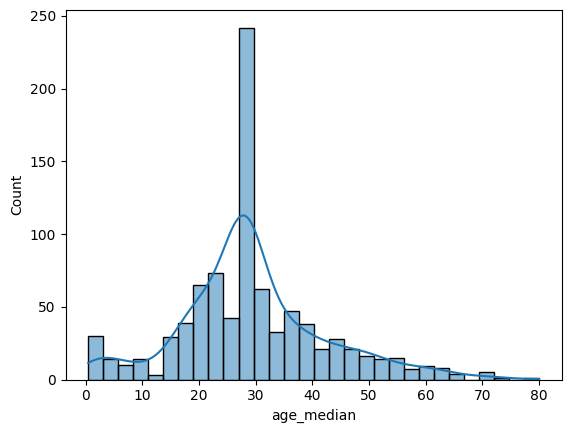

In [16]:
sns.histplot(df['age_median'], kde = True)

## Mode Imputation - with categorical data

In [47]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embarked_mode
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,S
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,S


In [46]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]
df['embarked_mode'] = df['embarked'].fillna(mode_value)

In [52]:
df['embarked_mode'].isnull().sum()

np.int64(0)

## Handling imbalanced dataset
1. Up sampling
2. Down sampling

In [53]:
np.random.seed(123)

#create a dataframe with two classes
n_samples =  1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [55]:
n_class_0, n_class_1

(900, 100)

In [77]:
## Create a dataframe with imbalanced dataset
class_0 = pd.DataFrame({'feature_1' : np.random.normal(loc = 0, scale=1, size=n_class_0),
                        'feature_2' : np.random.normal(loc = 0, scale=1, size=n_class_0),
                        'target' : [0] * n_class_0
                        })

class_1 = pd.DataFrame({'feature_1' : np.random.normal(loc = 2, scale=1, size=n_class_1),
                        'feature_2' : np.random.normal(loc = 2, scale=1, size=n_class_1),
                        'target' : [1] * n_class_1
                        })

In [78]:
df =pd.concat([class_0, class_1]).reset_index(drop=True)

In [79]:
df.head()

,feature_1,feature_2,target
0,0.226907,-0.525923,0
1,-2.398554,0.229579,0
2,-0.447858,-0.560087,0
3,0.197384,1.115389,0
4,0.627365,0.698765,0


In [80]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [81]:
from sklearn.datasets import make_classification

In [91]:
X,y = make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, weights = [0.9], random_state=12)
y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [94]:
df = pd.DataFrame(X, columns=['f1', 'f2'])
df1 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df, df1], axis = 1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [93]:
df1['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

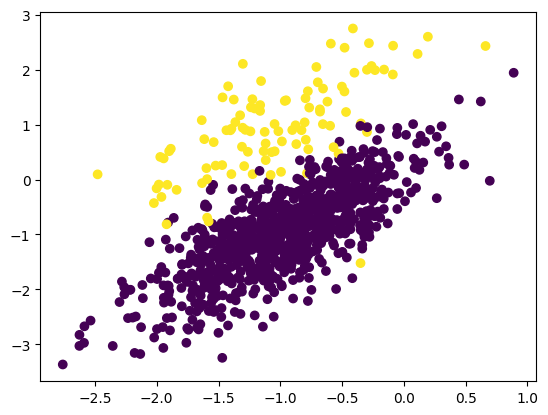

In [95]:
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [97]:
from imblearn.over_sampling import SMOTE

## transform the dataset using smote

In [98]:
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [104]:
final_df2 = pd.DataFrame(pd.concat([X,y], axis=1))
final_df2['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

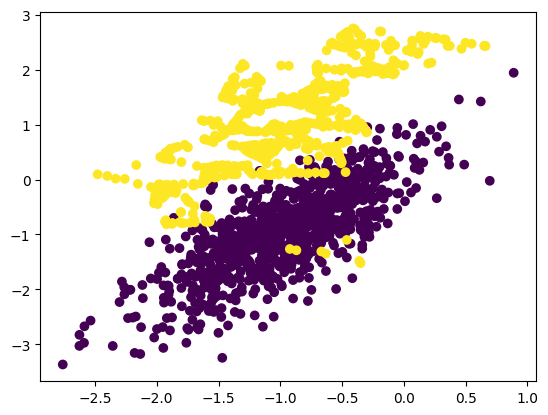

In [105]:
plt.scatter(final_df2['f1'], final_df2['f2'], c=final_df2['target'])

In [106]:
np

<module 'numpy' from 'd:\\Softwares\\programming\\python\\Lib\\site-packages\\numpy\\__init__.py'>

In [108]:
final_df2.shape

(1800, 3)

In [114]:
lst_marks = [45, 66, 55, 88, 66, 32, 45, 21, 84, 32, 65, 97, 12, 54, 67, 100]
minimum, Q1, median, Q3, maximum = np.quantile(lst_marks, [0, 0.25, 0.50, 0.75, 1.0]).tolist()

In [116]:
minimum, Q1, median, Q3, maximum

(12.0, 41.75, 60.0, 71.25, 100.0)

In [117]:
IQR = Q3 - Q1
IQR

29.5

In [118]:
lower_fence = Q1 - 1.5*(IQR)
higher_fence = Q3 + 1.5*(IQR)

In [119]:
lower_fence

-2.5

<Axes: >

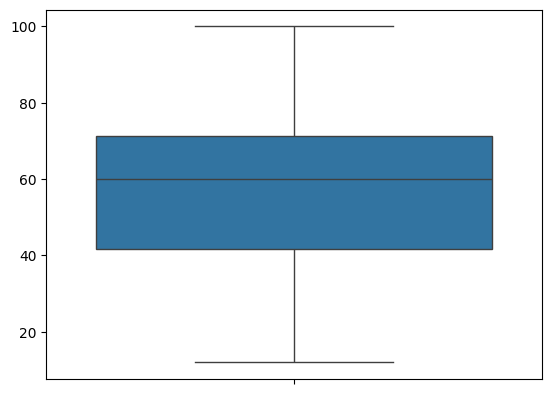

In [124]:
sns.boxplot(lst_marks)

<Axes: >

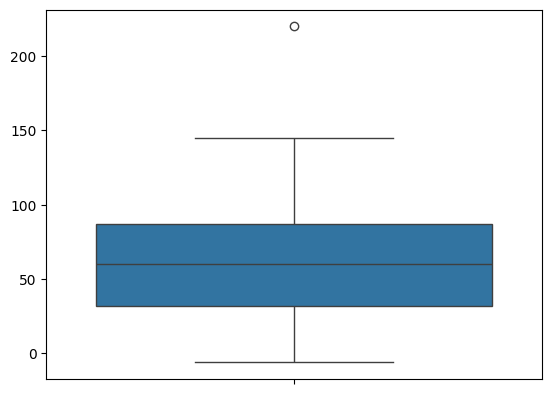

In [128]:
lst_marks = [-5, -6, -1, 45, 66, 55, 88, 66, 32, 45, 21, 84, 32, 65, 97, 12, 54, 67, 100, 145, 220, 125]
sns.boxplot(lst_marks)

In [129]:
df = pd.DataFrame(lst_marks, columns=['f1'])
df

,f1
0,-5
1,-6
2,-1
3,45
4,66
5,55
6,88
7,66
8,32
9,45


In [131]:
clean_df = df[df['f1'].between(lower_fence, higher_fence)].reset_index(drop=True)
clean_df

,f1
0,-1
1,45
2,66
3,55
4,88
5,66
6,32
7,45
8,21
9,84


<Axes: >

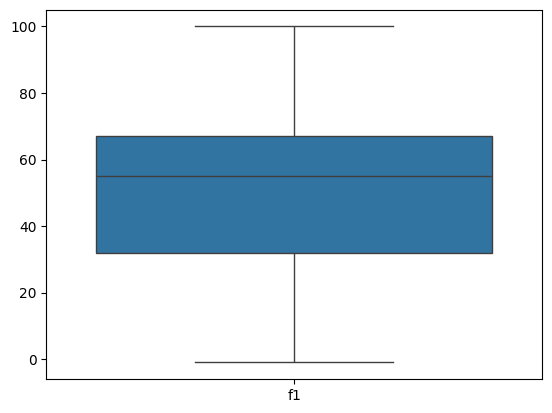

In [132]:
sns.boxplot(clean_df)